# Laboratorio 6.1
Elaborado por Oscar Franco-Bedoya

Proyecto Mision TIC 2021

# Objetivo
En este laboratorio vamos a crear una aplicación que nos permitirá entender mejor el potencial de los archivos mediante la implementción de un proyecto práctico.

# Contexto
A pesar del control que se ha realizado para la vacunación en el mundo ASCII. (un mundo de dos dimensiones con habitantes construidos con caracteres) aún se siguen presentando problemas en la identificación de las personas que ya están vacunadas.  

Por lo tanto se ha decidido utilizar un sistema de identificación biométrico que permita identificar los rostros codificados de las personas que ya han sido vacunadas.


## Prototipo
Para ver si estamos en capacidad de realizar este programa nos han pedido un prototipo en donde se da una descripción a muy bajo nivel del rostro de un **Ascciano** (Habitante del mundo ASCII)  en un archivo texto con 5 lineas codificadas, luego, con la información en este archivo,se debe dibujar el rostro del **Ascciano** en la consola.

La siguiente grafica muestra un ejemplo del archivo de entrada codificado y del rostro que debe dibujarse.


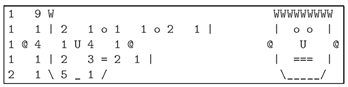


Como se puede apreciar en la figura, cada línea tiene codificado un rasgo del rostro de la persona:
* Cada linea se refiere a una parte del rostro
   * Cabello
   *  Ojos
   *  Orejas-Nariz
   *  Boca
   *  Cuello
* Cada inea esta formada por una lista de codigos 
    * Cada código es una pareja de valores (numero caracter) separados por el caracter tabulador, el numero indica la cantidad de veces que se repite el carácter.

**Ejemplo**

En la figura anterior el código del cabello es:

`1   9W` Es decir 1 espacio y 9 letras W






### Otros ejemplos

Estos son ejemplos de otros habitantes del mundo ASCII.

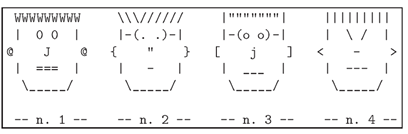

# Programando la aplicación

Como ya es costrumbre, vamos a **dividir** el problema en dos partes, (1) la primera parte es la encargada de abrir y leer el archivo con el rostro codificado y hace las transformaciones necesarias para almacenar la información en una estructura de datos dinámica, (2) la segunda se encargará de dibujar el rostro en la consola.

##  Del archivo a las estructuras de datos

Ya sabemos que el archivo con los códigos del rostro se encuentra en la memoria secundaria (persistente), también sabemos  que para poder realizar las operaciones en un programa los datos deben estar en la memoria principal y para ello se necesitan estructuras de datos.

De acuerdo al ejemplo, el contenido del archivo es el siguiente

| Rostro.txt  |  
|----------|
|1 	,9 W
1 \t,1 \|,2 ,1 o,1  ,1 o,2 \t,1 |
1 @,4 \t,1 U,4 \t,1 @
1 \t,1 \t\|,2 \t,3 =,2 \t,1 |´
2 \t,1 \,5 _,1 /|

Tenemos una lista de 5 elementos donde cada uno contiene una lista de los  códigos de cada parte del rostro, los cuales a su vez son una lista (¿tupla?) con dos valores (número y caracter). En resumen tenemos una lista de listas de listas :-)

Vamos a trabajar con esa perspectiva

### Obteniendo la lista inicial 
Podemos inicialmente leer estas líneas y guardarlas en una lista.

**NOTA**
Para poder trabajar con este ejercicio debe estar almacenado en la carpeta sample_data el archivo llamado rostro.txt, con el siguiente contenido, pídele apoyo a tu formador/tutor para que te explique como hacerlo. 



```
1	 ,9	W
1	 ,1	|,2	 ,1	o,1	o,2	 ,1	|
1	@,4	 ,1	U,4	 ,1	@
1	 ,1	|,2	 ,3	=,2	 ,1	|
2	 ,1	\,5	_,1	/
```





In [ ]:
from pprint import pprint  #permite imprimir estructuras de datos complejas de una manera amigable

fh = open('/content/sample_data/rostro.txt')
codigos = []
for linea in fh:
  codigos.append(linea)
  
pprint(codigos)


['1\t ,9\tW\n', '1\t ,\t|,2\t ,1\to,1\to,2\t ,1\t|']


### Obtenendo la lista de listas
Para poder manipular la información necesitamos una estructura de datos más "amigable" que nos permita separar los códigos. En lugar de una lista de cadenas, vamos a obtener una lista de listas.



In [ ]:
from pprint import pprint

fh= open('/content/sample_data/rostro.txt')
codigos = []
for linea in fh:
  codigos.append(linea.rstrip().split(',')) #La función split parte una cadena en subcadenas que esten separadas por `,`
  
pprint(codigos)

[['1\t ', '9\tW'], ['1\t ', '1\t|', '2\t ', '1\to', '1\to', '2\t ', '1\t|']]


### Obteniendo la lista de listas de listas

Adelantándonos un poco a la estrategia para dibujar el rostro, sería muy conveniente tener separados las parejas numero y carácter por cada lìnea del archivo.

In [ ]:
from pprint import pprint

fh= open('/content/sample_data/rostro.txt')
rostro = []  #estructura para el rostro completo que esta formado por 5 lineas
for linea in fh: #recorre el archivo
  codigos_linea= linea.strip().split(',') #obtiene la lista de codigos por cada linea
  linea=[]
  for codigo in codigos_linea: #separa el numero del caracter 
    linea.append(codigo.split('\t')) 

  rostro.append(linea)

pprint(rostro)  


[[['1', ' '], ['9', 'W']],
 [['1', ' '],
  ['1', '|'],
  ['2', ' '],
  ['1', 'o'],
  ['1', 'o'],
  ['2', ' '],
  ['1', '|']]]


### Funciona pero se ve feo

El tema de la semana es no reinventar la rueda, ademas ya somos expertos en funciones, por lo tanto vamos a organizar nuestro programa como una función.

In [ ]:
from pprint import pprint

def cargar_rostro(archivo):
  fh= open(archivo)
  rostro = []  #estructura para el rostro completo que esta formado por 5 lineas
  for linea in fh: #recorre el archivo
    codigos_linea= linea.rstrip().split(',') #obtiene la lista de codigos por cada linea
    linea=[]
    for codigo in codigos_linea: #separa el numero del caracter 
      linea.append(codigo.split('\t')) 
    rostro.append(linea)
  return rostro 
#----------------------------------------------------------------------------

codigos_rostro=cargar_rostro('/content/sample_data/rostro.txt')
pprint(codigos_rostro)
  

[[['1', ' '], ['9', 'W']],
 [['1', ' '],
  ['1', '|'],
  ['2', ' '],
  ['1', 'o'],
  ['1', 'o'],
  ['2', ' '],
  ['1', '|']]]


## Dibujando el rostro
Esta segunda parte del programa recibe la estructura de datos obtenida en la primera parte, es decir una lista de listas de listas (3 niveles)  la cual se debe recorrer secuencialmente para ir imprimir el rostro.   

In [ ]:
from pprint import pprint


def cargar_rostro(archivo):
  """ 
  Parameters
  ----------
  archivo:string
    El identificador del archivo y la ubicación  del mismo
  Returns
  -------
  Rostro:[[[]]]
    Una lista de 3 niveles con el rostro codificado en el archivo    
  """  
  fh= open(archivo)
  rostro = []  #estructura para el rostro completo que esta formado por 5 lineas
  for linea in fh: #recorre el archivo
    codigos_linea= linea.rstrip().split(',') #obtiene la lista de codigos por cada linea
    linea=[]
    for codigo in codigos_linea: #separa el numero del caracter 
      linea.append(codigo.split('\t')) 
    rostro.append(linea)
  return rostro 


def imprimir_rostro(rostro):
  """ 
  Parameters
  ----------
  Rostro:[[[]]]
    Una lista de 3 niveles con el rostro codificado en el archivo
  
  Returns
  -------
  Ninguno
    Presenta el rostro en la consola    
  """ 
  for linea_codigo in rostro: #recorre cada linea del rostro
    for codigo in linea_codigo: #recorre cada codigo de la linea
       imprimir_linea(codigo) #imprime el caracter un numero de veces
    print("\n")


def imprimir_linea(codigo):

  """ 
  Parameters
  ----------
  codigo: string
  un codigo (numero, letra)  
  Returns
  -------
  Ninguno
    imprime en la consola el caracter del codigo la cantidad de veces en numero    
  """ 

  numero=int(codigo[0])
  caracter=codigo[1]
  for i in range(0,numero):
    print(caracter,end="") 
  
  
#----------------------------------------------------------------------------

codigos_rostro=cargar_rostro('/content/sample_data/rostro.txt')
imprimir_rostro(codigos_rostro)




 WWWWWWWWW

 |  oo  |

@    U    @

 |  ===  |

  \_____/



# Ejercicio
Prueba a crear los archivos de los demas rostros del ejemplo
---
FIN DEL LABORATORIO
---

